In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import urllib2
%matplotlib inline

In [4]:
import dateutil.parser
mta_url_1 = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_150606.txt"
mta_url_2 ="http://web.mta.info/developers/data/nyct/turnstile/turnstile_150613.txt"
mta_url_3 ="http://web.mta.info/developers/data/nyct/turnstile/turnstile_150620.txt"
mta_url_4 ="http://web.mta.info/developers/data/nyct/turnstile/turnstile_150627.txt"
mta_url_5 ="http://web.mta.info/developers/data/nyct/turnstile/turnstile_150704.txt"
mta_url_6 ="http://web.mta.info/developers/data/nyct/turnstile/turnstile_150711.txt"
mta_url_7 ="http://web.mta.info/developers/data/nyct/turnstile/turnstile_150718.txt"
mta_url_8 ="http://web.mta.info/developers/data/nyct/turnstile/turnstile_150725.txt"
mta_url_9 ="http://web.mta.info/developers/data/nyct/turnstile/turnstile_150801.txt"
mta_url_10 ="http://web.mta.info/developers/data/nyct/turnstile/turnstile_150808.txt"
mta_url_11 ="http://web.mta.info/developers/data/nyct/turnstile/turnstile_150815.txt"
mta_url_12 ="http://web.mta.info/developers/data/nyct/turnstile/turnstile_150822.txt"
mta_url_13 ="http://web.mta.info/developers/data/nyct/turnstile/turnstile_150829.txt"

data_1 = urllib2.urlopen(mta_url_1)
data_2 = urllib2.urlopen(mta_url_2)
data_3 = urllib2.urlopen(mta_url_3)
data_4 = urllib2.urlopen(mta_url_4)
data_5 = urllib2.urlopen(mta_url_5)
data_6 = urllib2.urlopen(mta_url_6)
data_7 = urllib2.urlopen(mta_url_7)
data_8 = urllib2.urlopen(mta_url_8)
data_9 = urllib2.urlopen(mta_url_9)
data_10 = urllib2.urlopen(mta_url_10)
data_11 = urllib2.urlopen(mta_url_11)
data_12 = urllib2.urlopen(mta_url_12)
data_13 = urllib2.urlopen(mta_url_13)


# new_data_1 = [x.strip() for x in data_1]
# new_data_2 = [x.strip() for x in data_2]
# new_data_3 = [x.strip() for x in data_3]
# new_data_4 = [x.strip() for x in data_4]
# new_data_5 = [x.strip() for x in data_5]
# new_data_6 = [x.strip() for x in data_6]
# new_data_7 = [x.strip() for x in data_7]
# new_data_8 = [x.strip() for x in data_8]
# new_data_9 = [x.strip() for x in data_9]
# new_data_10 = [x.strip() for x in data_10]
# new_data_11 = [x.strip() for x in data_11]
# new_data_12 = [x.strip() for x in data_12]
# new_data_13 = [x.strip() for x in data_13]

new_data_1 = [
    [x.strip() for x in data_1],
    [x.strip() for x in data_2],
    [x.strip() for x in data_3],
    [x.strip() for x in data_4],
    [x.strip() for x in data_5],
    [x.strip() for x in data_6],
    [x.strip() for x in data_7],
    [x.strip() for x in data_8],
    [x.strip() for x in data_9],
    [x.strip() for x in data_10],
    [x.strip() for x in data_11],
    [x.strip() for x in data_12],
    [x.strip() for x in data_13]
    ]

# data = new_data_1[1:] + new_data_2[1:] 

def add_things(list_of_data):
    data = []
    for i in list_of_data:
        data += i[1:]        
    return data

data = add_things(new_data_1)
 

## create list which contains list elemtents (value_list)
lists_of_list = []
def list_of_dictval(data):
  for item in data:
    rowlist = item.split(",")
    tuple_key = tuple(rowlist[:4])
    date_time = rowlist[-5] + " " + rowlist[-4]
    date_time = dateutil.parser.parse(date_time)
    entries = int(rowlist[-1])
    value_list = []
    value_list.append(tuple_key)
    value_list.append(date_time)
    value_list.append(entries)
    lists_of_list.append(value_list)



## append prior period cumulative entries to current list
def append_prior_cum_entries(lists_of_list):
  cnt = 0 
  for item in lists_of_list:
    if cnt == 0:
      lists_of_list[cnt].append(1)
    elif lists_of_list[cnt][0] == lists_of_list[cnt-1][0]:
      lists_of_list[cnt].append(lists_of_list[cnt-1][2])
    else:
      lists_of_list[cnt].append(1) 
    cnt = cnt + 1

## take difference between two cum entries to get count of entries
def append_count_entries(lists_of_list):
  cnt = 0
  for item in lists_of_list:
    if cnt == 0:
      lists_of_list[cnt].append(0)
    elif lists_of_list[cnt][0] == lists_of_list[cnt-1][0]:
      lists_of_list[cnt].append((lists_of_list[cnt][2] - lists_of_list[cnt][3]))
    else:
      lists_of_list[cnt].append(0) 
    cnt = cnt + 1

## create the dictionary with keys with empty list values
mta_ts_dict = {}
def insert_dict_keys(lists_of_list):
  for item in lists_of_list:
    key = item[0]
    mta_ts_dict[key] = []
  return mta_ts_dict

## populate the values for each key
def mta_time_series_dict(lists_of_list):
  cnt = 0
  for item in lists_of_list:
    key = lists_of_list[cnt][0]
    vlist = []
    vlist.append(item[1])
    vlist.append(item[-1])  
    if key in mta_ts_dict:
      mta_ts_dict[key].append(vlist)
    cnt = cnt + 1
  return mta_ts_dict

list_of_dictval(data)
append_prior_cum_entries(lists_of_list)
append_count_entries(lists_of_list)
insert_dict_keys(lists_of_list)

cum_exits = mta_time_series_dict(lists_of_list)

In [9]:
turnstile, series = cum_exits.iteritems().next()

In [10]:
key = '_'.join(turnstile[:3])
key

'A030_R083_01-06-00'

In [169]:
# make an empty list
list_of_turnstile_sets = []
# for each turnstile, do this to it and add it to your list
for turnstile, data in cum_exits.iteritems():
    key = '_'.join(turnstile[:3])
    turnstile_set = [{'key':key,'timetamp':timestamp,'count':count} for timestamp, count in data]
    list_of_turnstile_sets += turnstile_set

# then make the df from the big list
# clean outliers
df = pd.DataFrame(list_of_turnstile_sets)
df2 = df[(df['count'] <= 2e4) & (df['count'] > 0 ) ]
df3 = df2.set_index(keys=df2.timetamp)
df3['dayofweek'] = df3.timetamp.map(lambda t: t.dayofweek)
# bar_plot = df3.groupby('dayofweek')
df3['timeofday'] = df3.timetamp.map(lambda t: t.hour)

ERROR! Session/line number was not unique in database. History logging moved to new session 743


In [146]:
import collections
DayOfWeek = collections.namedtuple('DayOfWeek', ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])
day_of_week = DayOfWeek(0, 1, 2, 3, 4, 5, 6)

In [172]:
df3.groupby('dayofweek').agg([np.std, np.mean])['count']

ERROR! Session/line number was not unique in database. History logging moved to new session 744


,std,mean
dayofweek,,
0,268.554164,177.587338
1,276.093436,185.344047
2,280.313256,190.617875
3,277.256270,189.352614
4,260.710841,181.640515
5,166.642249,119.049974
6,143.877948,104.880260


/usr/local/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


dayofweek  timeofday
0          0            [[Axes(0.125,0.125;0.775x0.775)]]
           1            [[Axes(0.125,0.125;0.775x0.775)]]
           2            [[Axes(0.125,0.125;0.775x0.775)]]
           3            [[Axes(0.125,0.125;0.775x0.775)]]
           4            [[Axes(0.125,0.125;0.775x0.775)]]
           5            [[Axes(0.125,0.125;0.775x0.775)]]
           6            [[Axes(0.125,0.125;0.775x0.775)]]
           7            [[Axes(0.125,0.125;0.775x0.775)]]
           8            [[Axes(0.125,0.125;0.775x0.775)]]
           9            [[Axes(0.125,0.125;0.775x0.775)]]
           10           [[Axes(0.125,0.125;0.775x0.775)]]
           11           [[Axes(0.125,0.125;0.775x0.775)]]
           12           [[Axes(0.125,0.125;0.775x0.775)]]
           13           [[Axes(0.125,0.125;0.775x0.775)]]
           14           [[Axes(0.125,0.125;0.775x0.775)]]
           15           [[Axes(0.125,0.125;0.775x0.775)]]
           16           [[Axes(0.125,0.125;0.775x0.

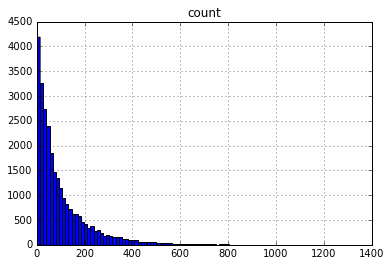

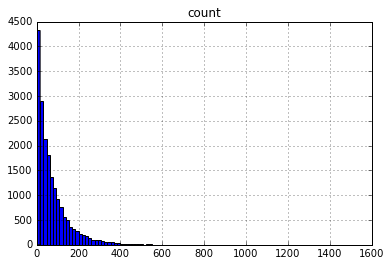

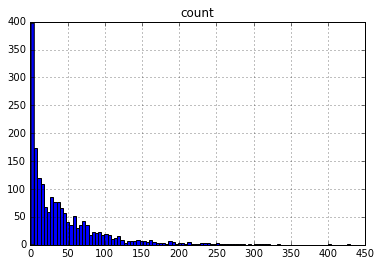

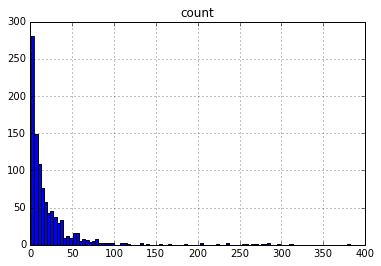

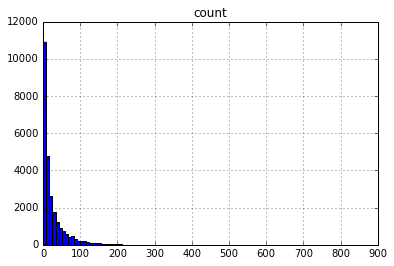

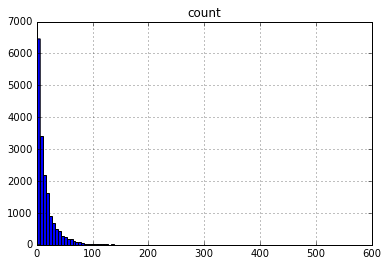

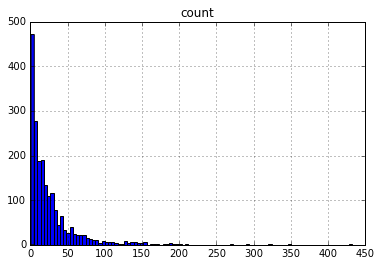

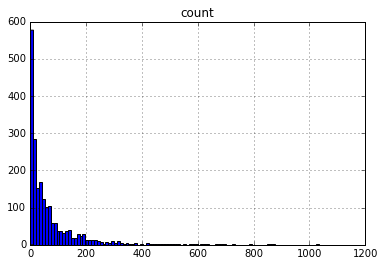

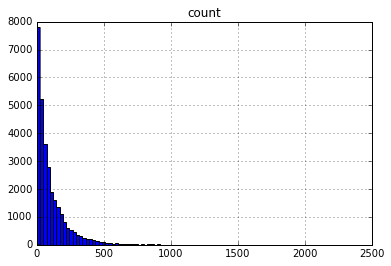

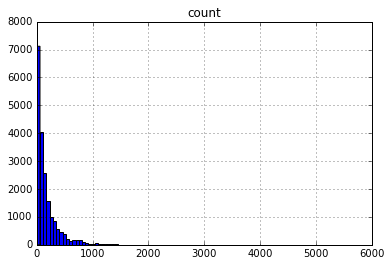

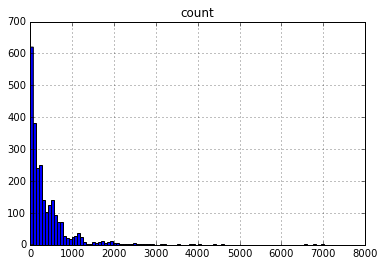

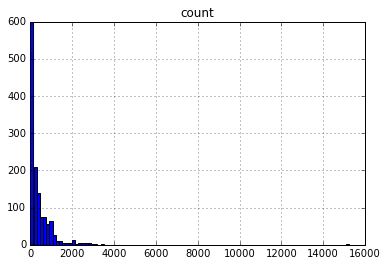

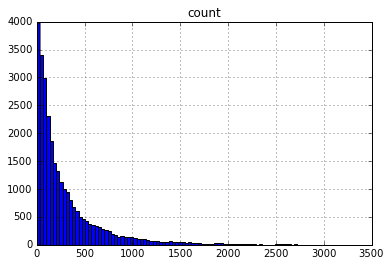

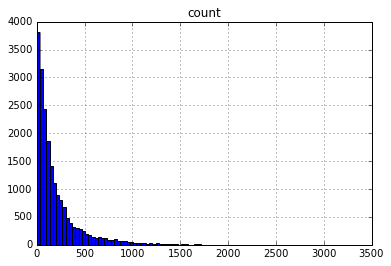

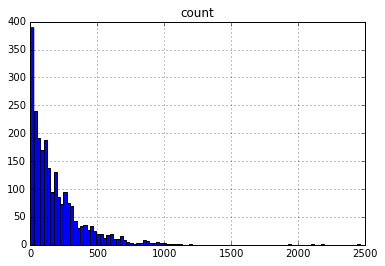

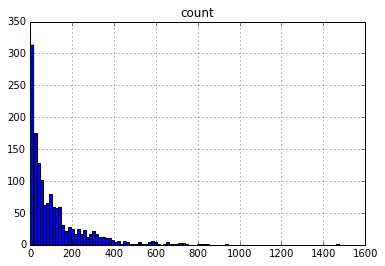

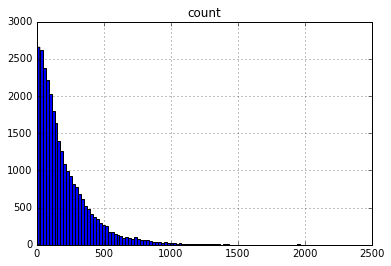

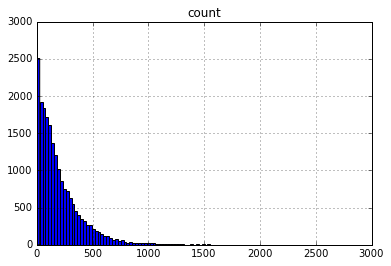

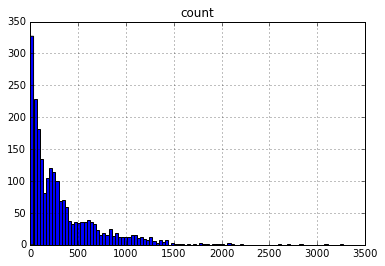

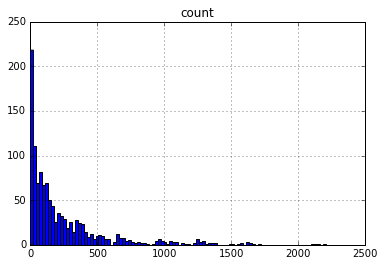

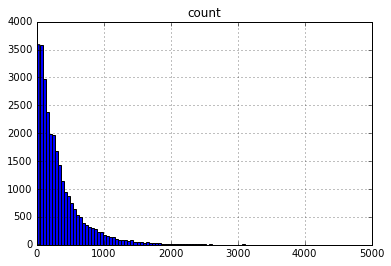

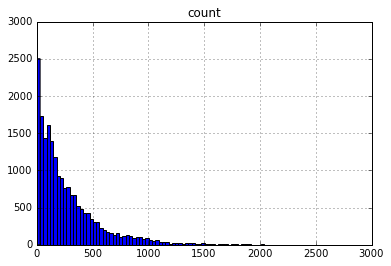

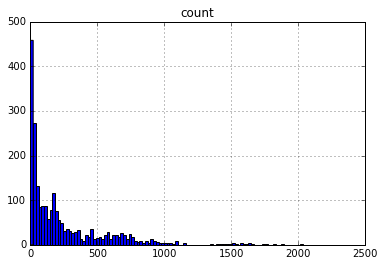

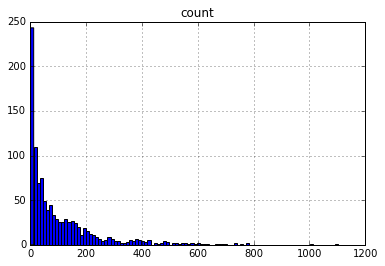

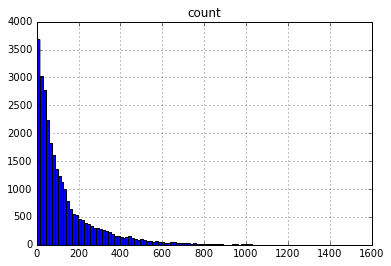

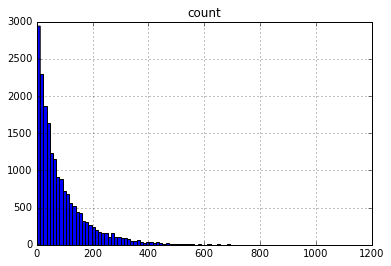

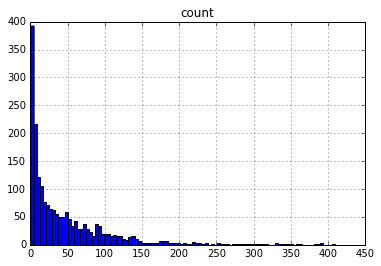

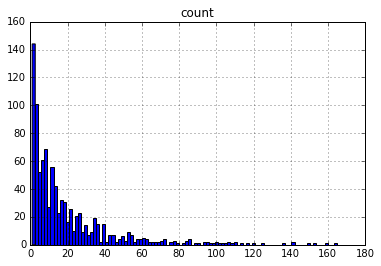

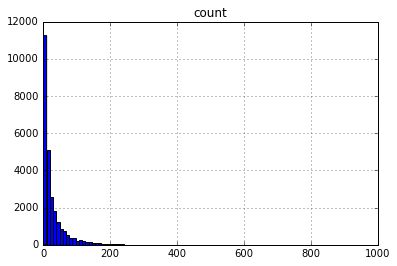

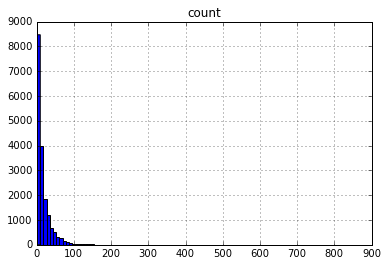

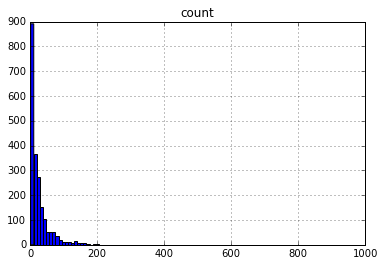

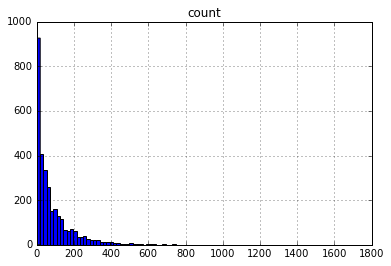

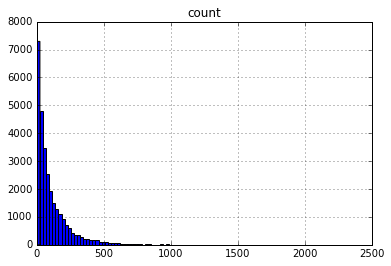

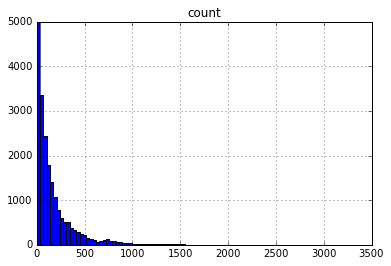

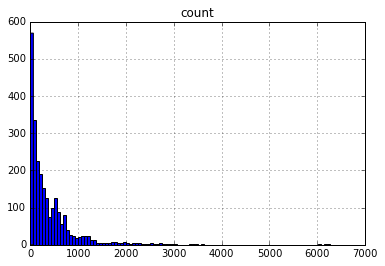

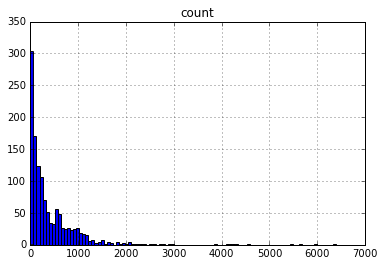

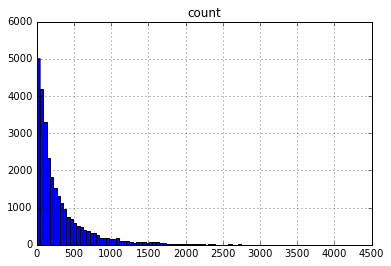

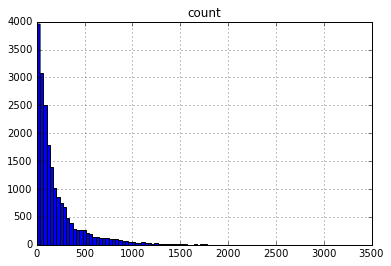

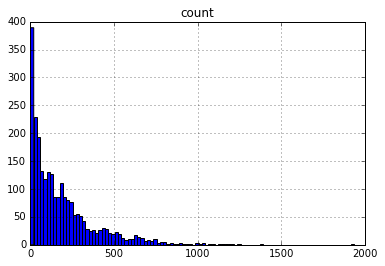

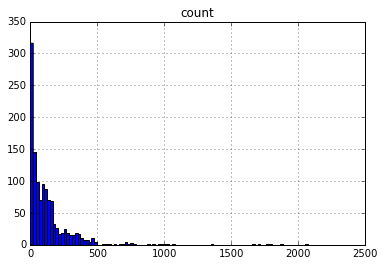

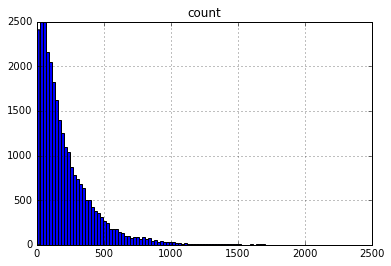

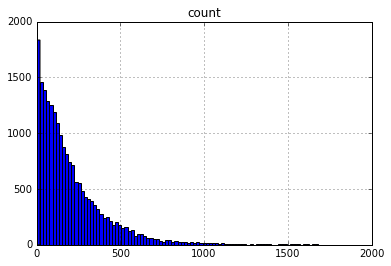

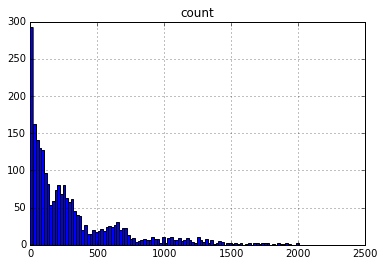

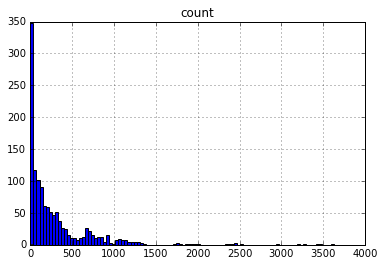

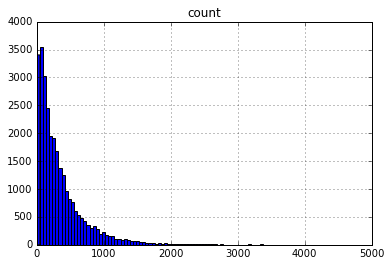

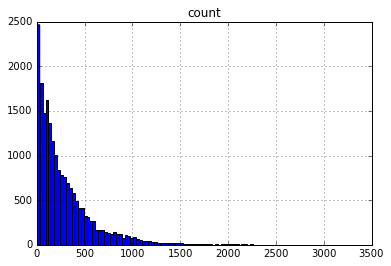

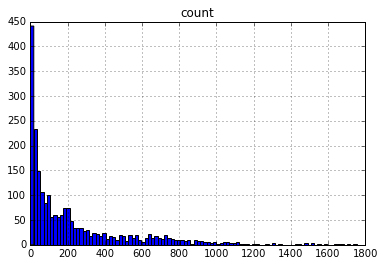

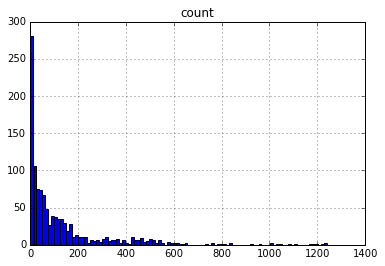

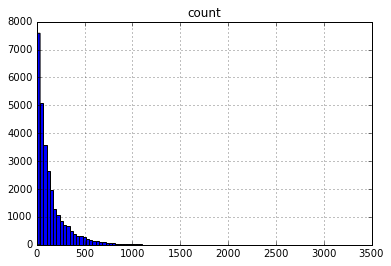

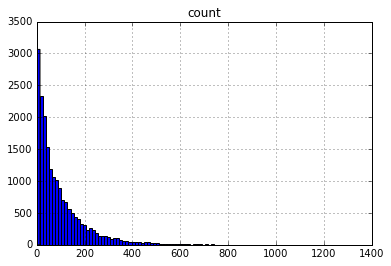

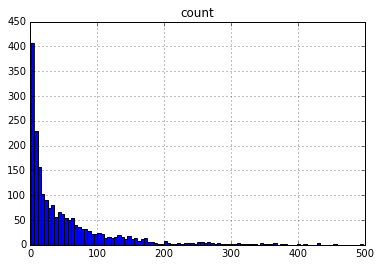

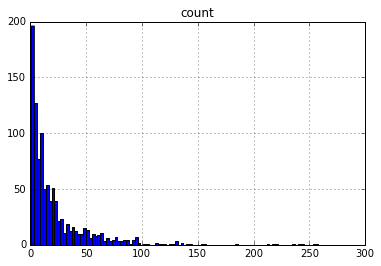

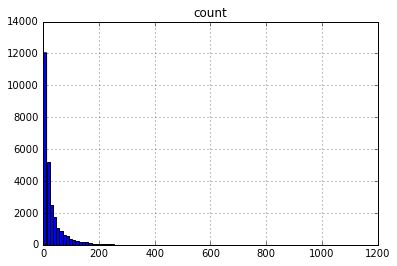

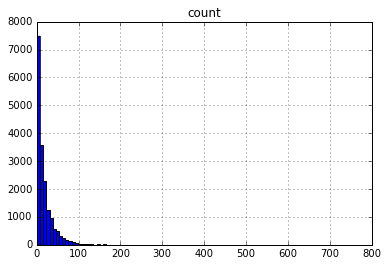

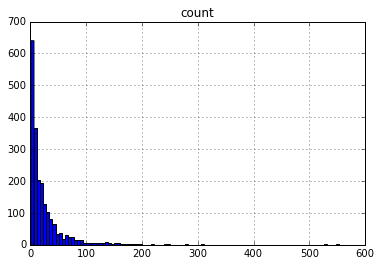

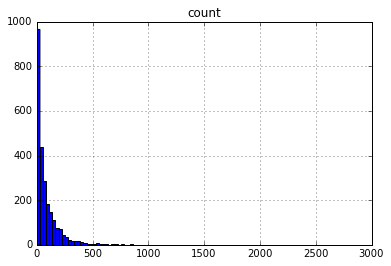

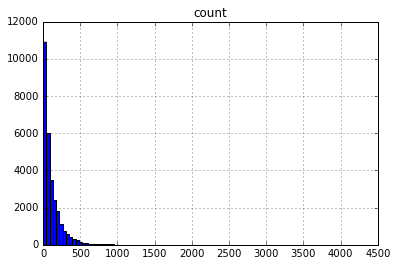

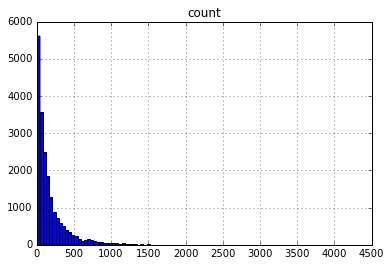

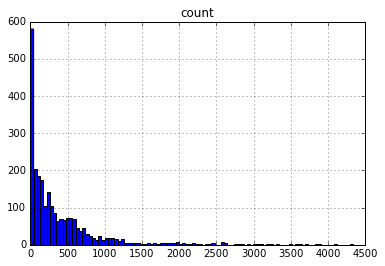

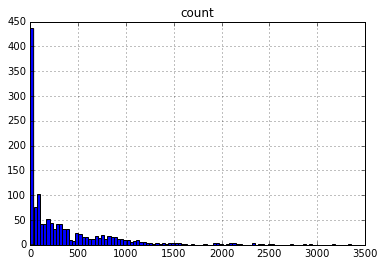

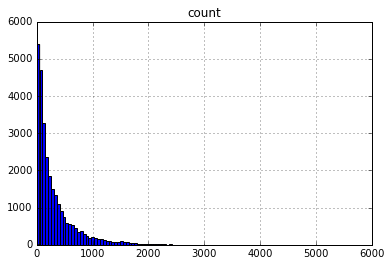

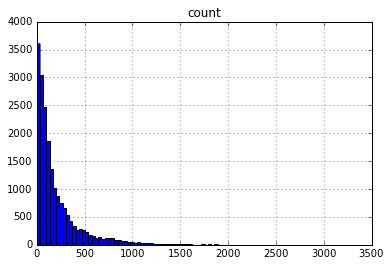

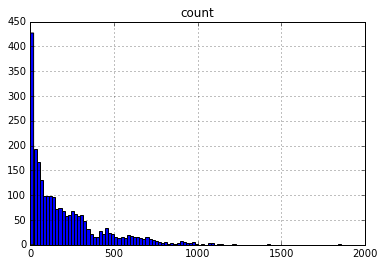

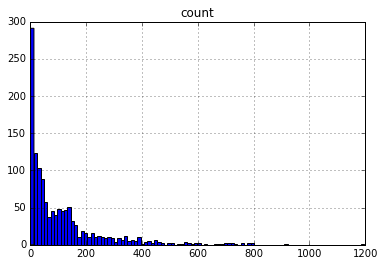

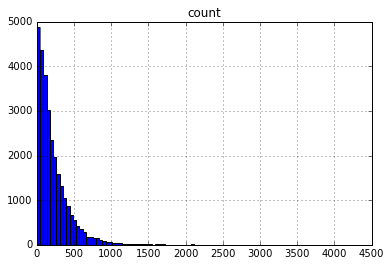

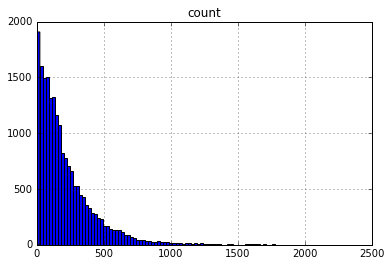

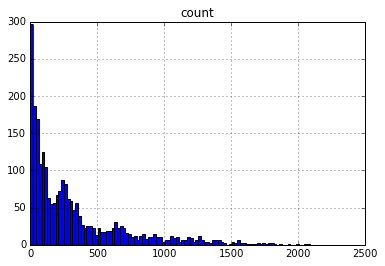

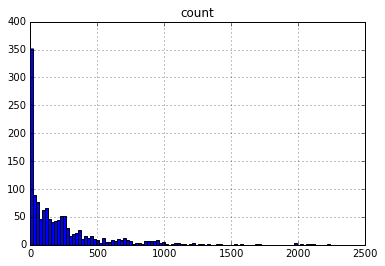

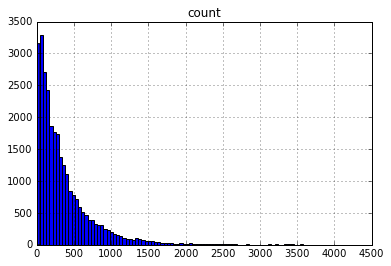

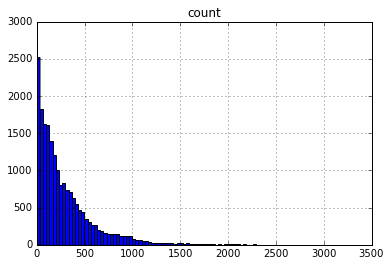

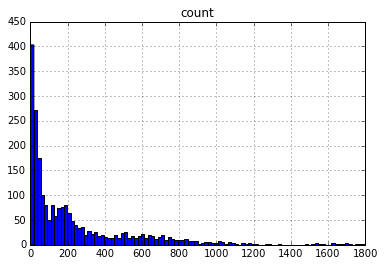

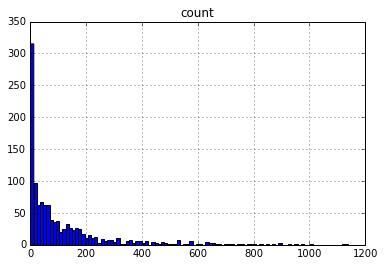

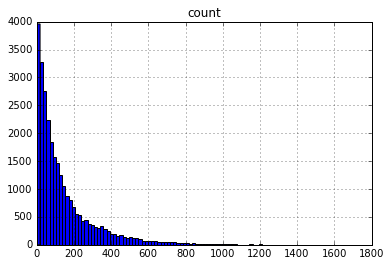

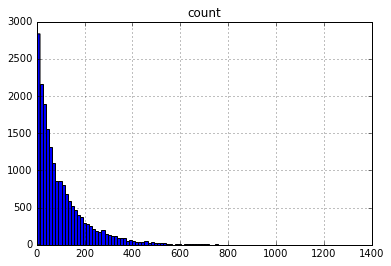

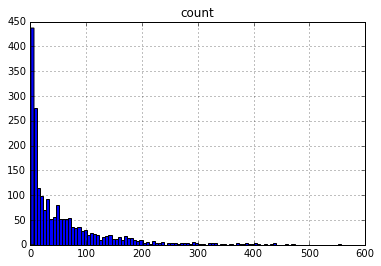

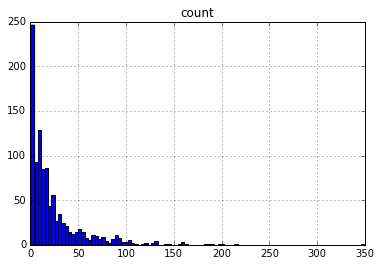

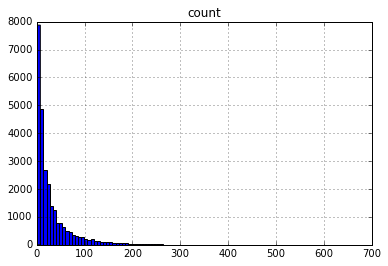

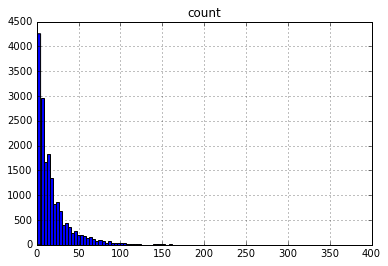

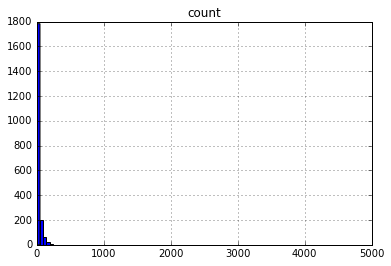

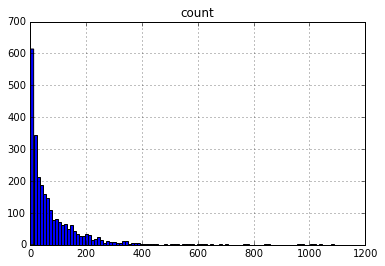

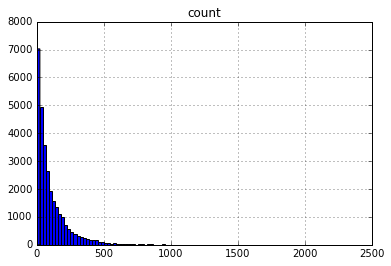

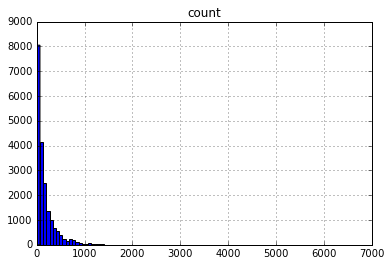

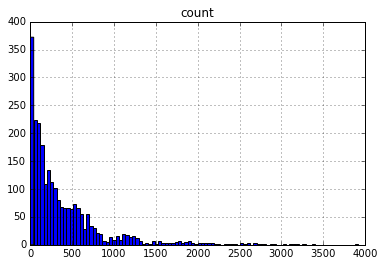

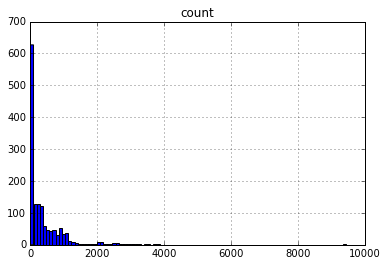

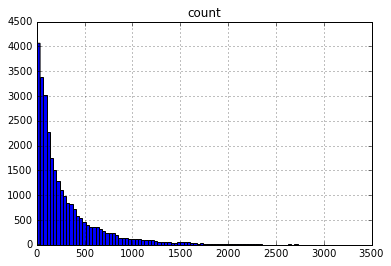

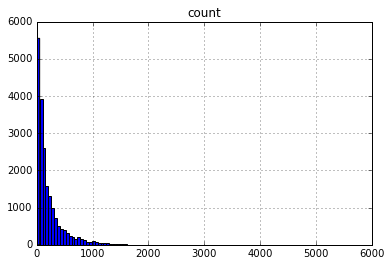

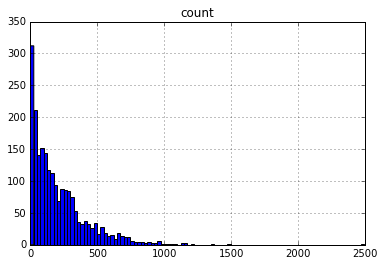

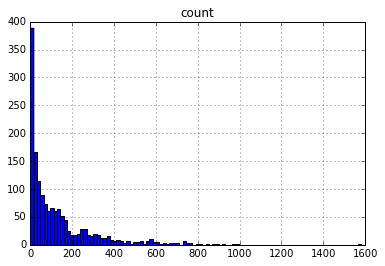

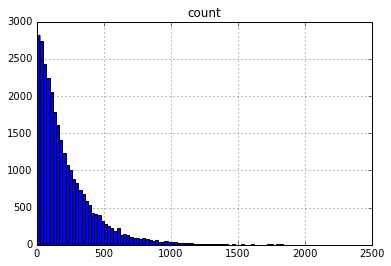

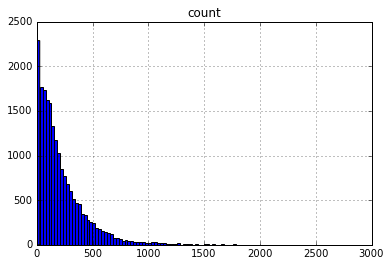

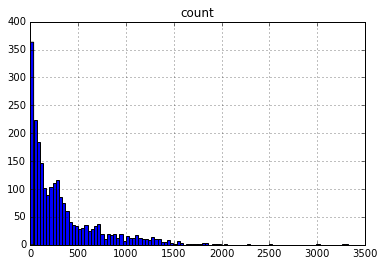

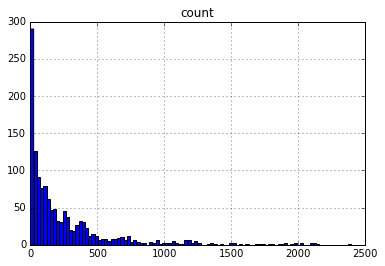

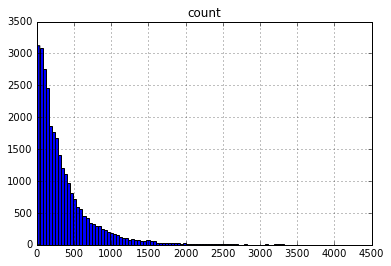

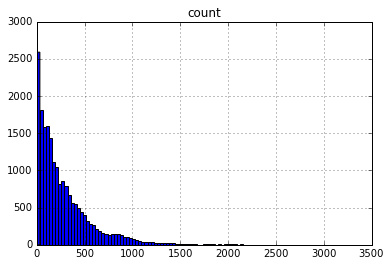

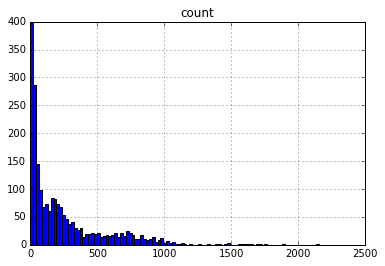

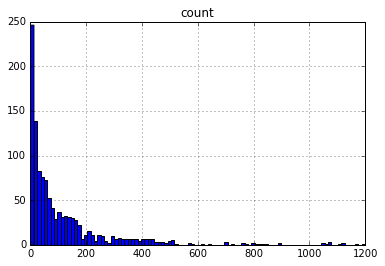

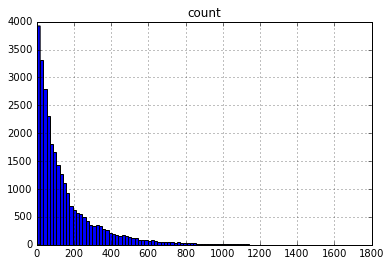

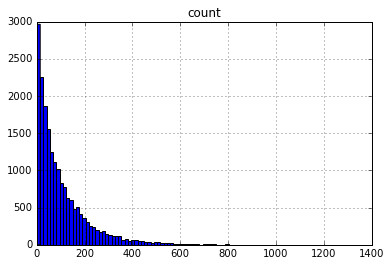

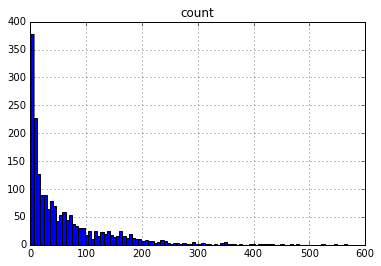

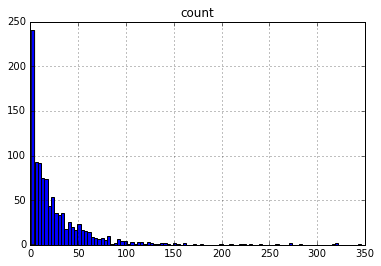

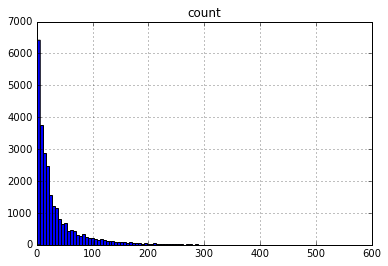

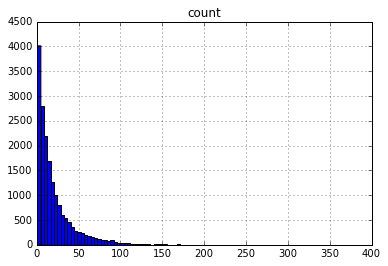

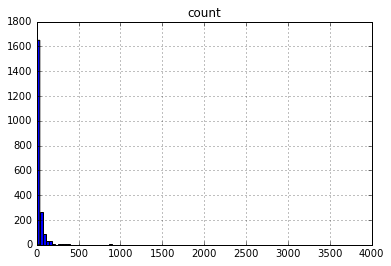

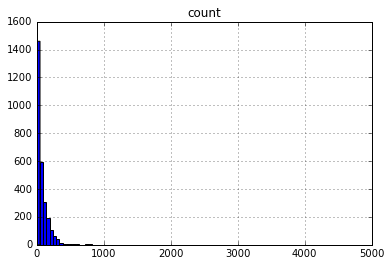

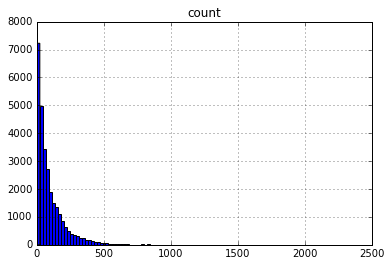

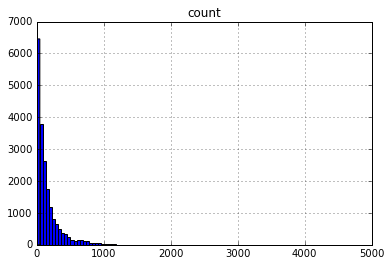

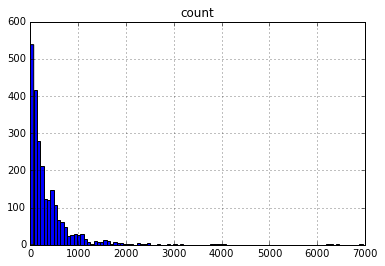

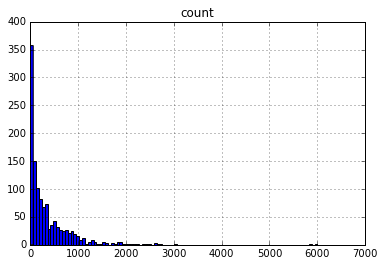

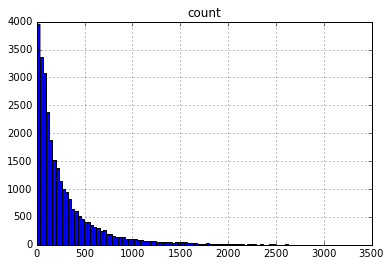

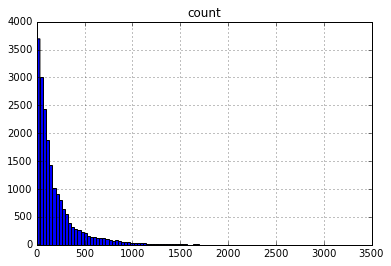

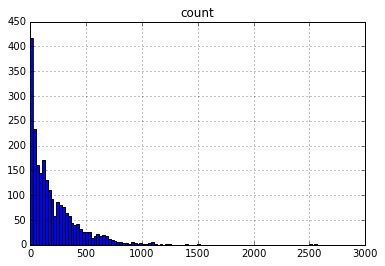

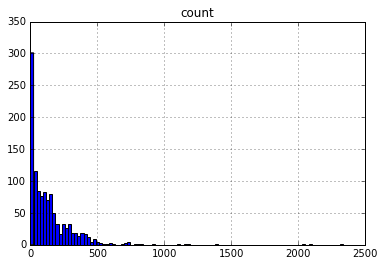

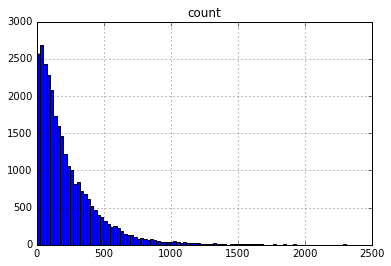

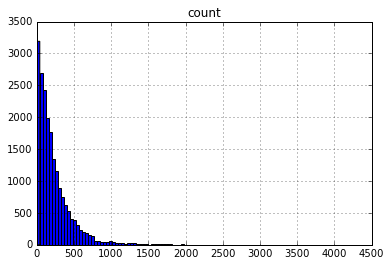

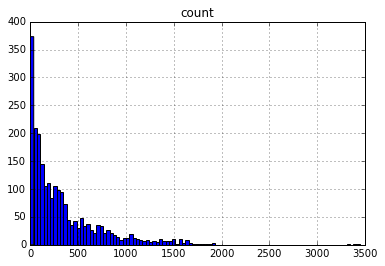

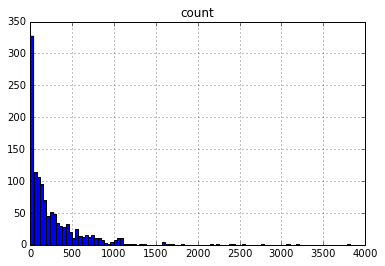

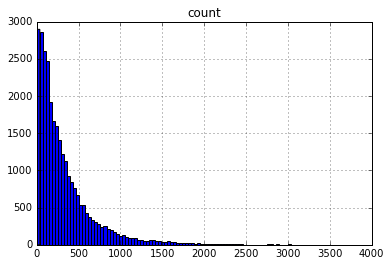

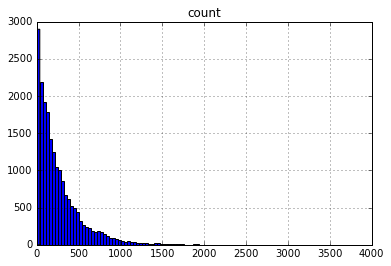

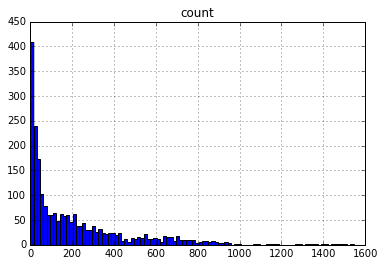

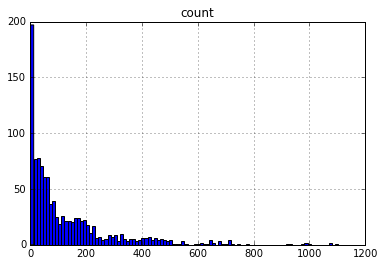

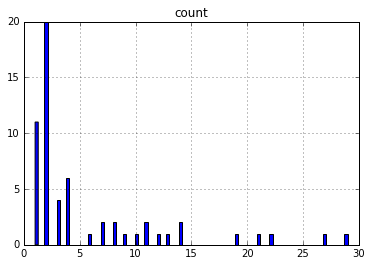

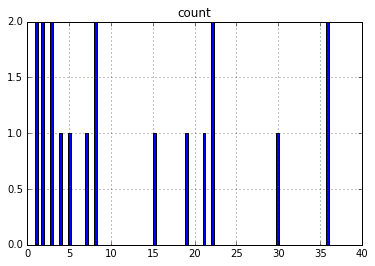

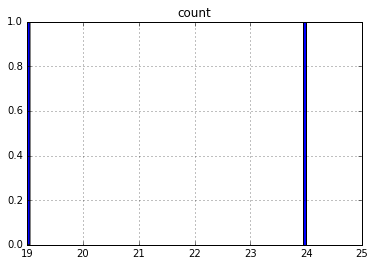

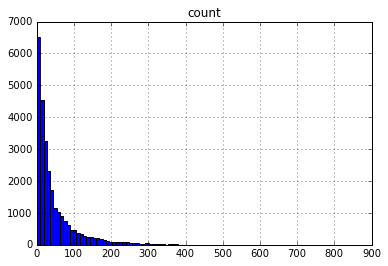

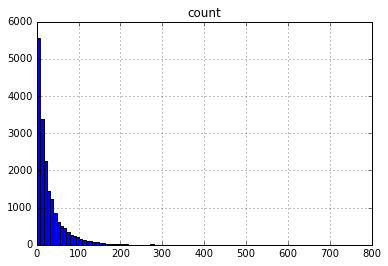

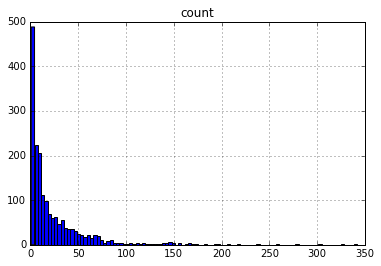

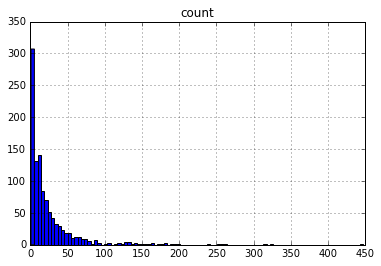

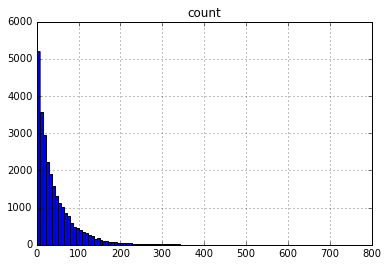

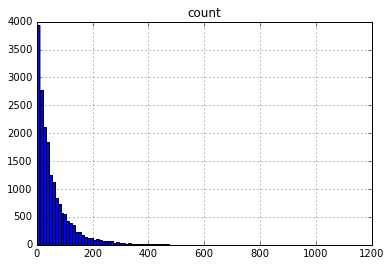

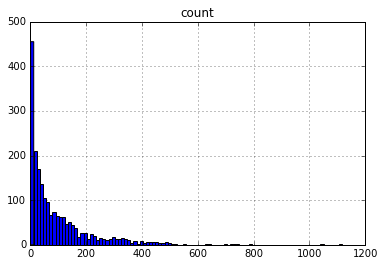

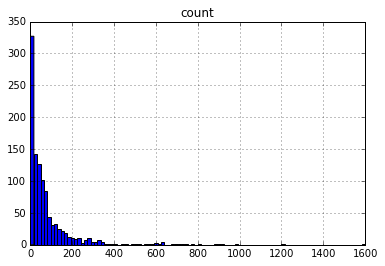

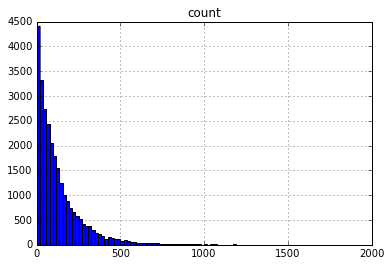

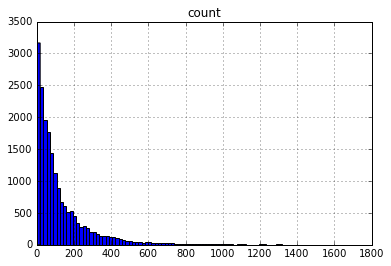

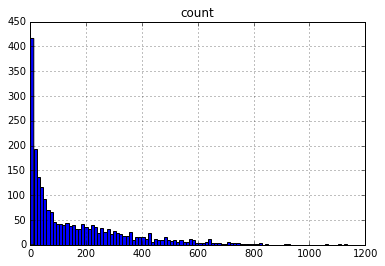

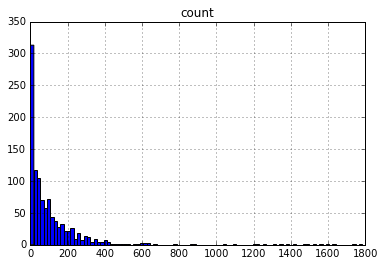

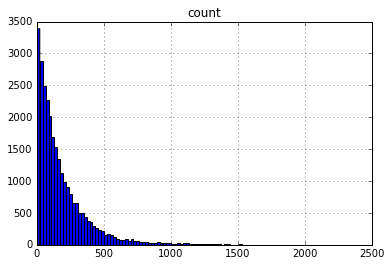

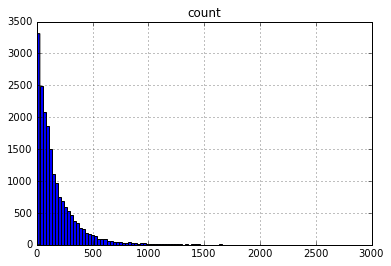

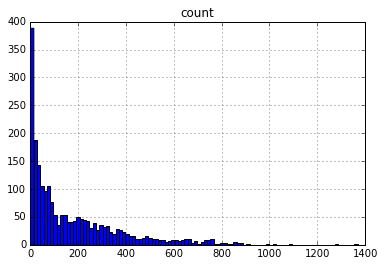

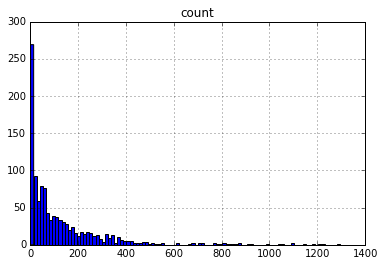

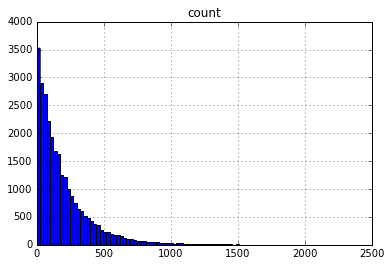

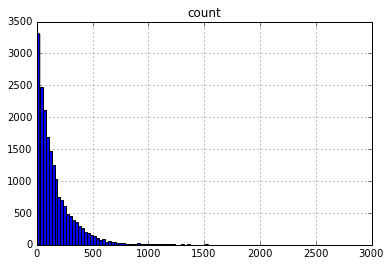

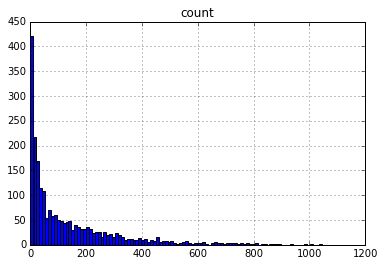

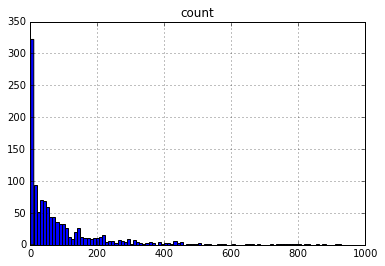

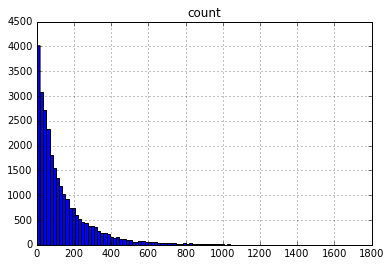

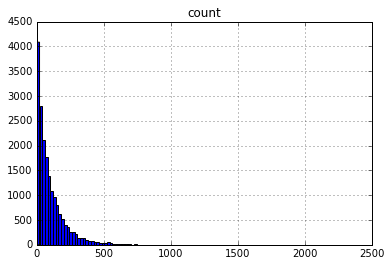

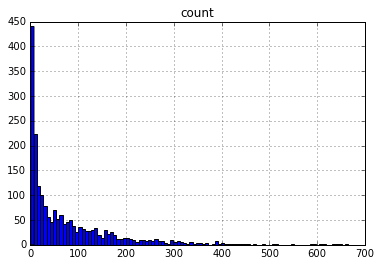

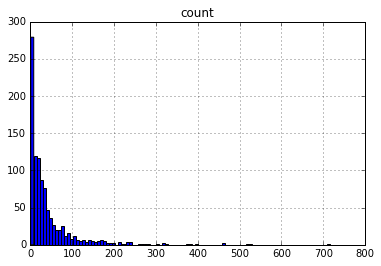

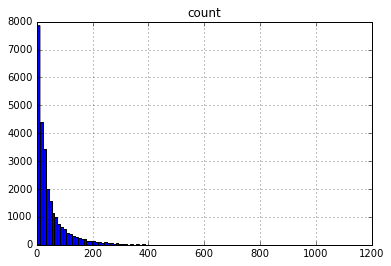

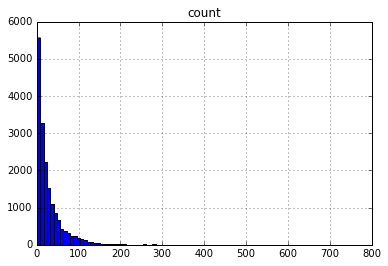

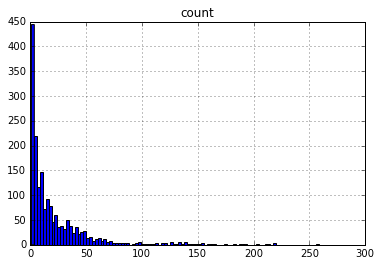

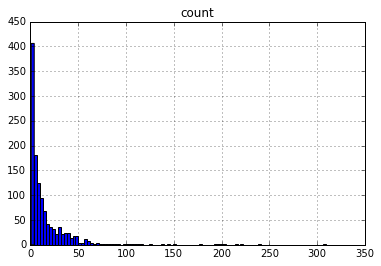

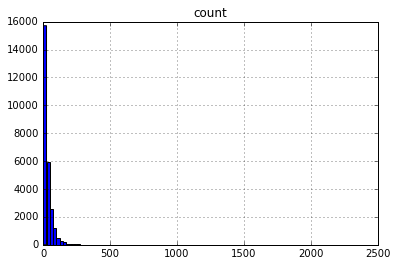

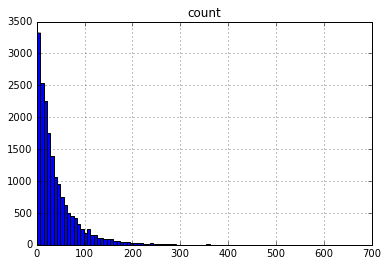

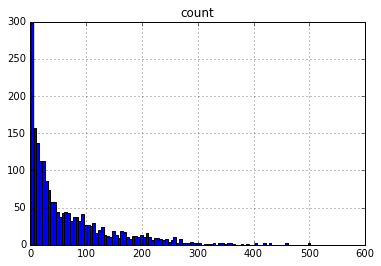

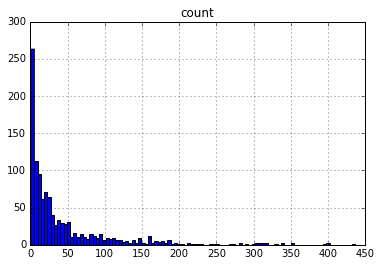

KeyboardInterrupt: 

In [168]:
df3.groupby(['dayofweek', 'timeofday']).hist(bins= 100)

TODO

timeofday
0     Axes(0.125,0.2;0.775x0.7)
1     Axes(0.125,0.2;0.775x0.7)
2     Axes(0.125,0.2;0.775x0.7)
3     Axes(0.125,0.2;0.775x0.7)
4     Axes(0.125,0.2;0.775x0.7)
5     Axes(0.125,0.2;0.775x0.7)
6     Axes(0.125,0.2;0.775x0.7)
7     Axes(0.125,0.2;0.775x0.7)
8     Axes(0.125,0.2;0.775x0.7)
9     Axes(0.125,0.2;0.775x0.7)
10    Axes(0.125,0.2;0.775x0.7)
11    Axes(0.125,0.2;0.775x0.7)
12    Axes(0.125,0.2;0.775x0.7)
13    Axes(0.125,0.2;0.775x0.7)
14    Axes(0.125,0.2;0.775x0.7)
15    Axes(0.125,0.2;0.775x0.7)
16    Axes(0.125,0.2;0.775x0.7)
17    Axes(0.125,0.2;0.775x0.7)
18    Axes(0.125,0.2;0.775x0.7)
19    Axes(0.125,0.2;0.775x0.7)
20    Axes(0.125,0.2;0.775x0.7)
21    Axes(0.125,0.2;0.775x0.7)
22    Axes(0.125,0.2;0.775x0.7)
23    Axes(0.125,0.2;0.775x0.7)
dtype: object

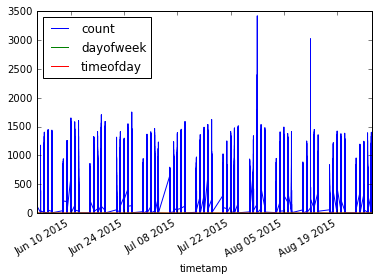

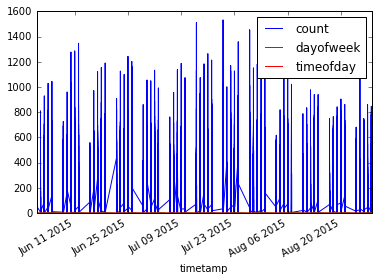

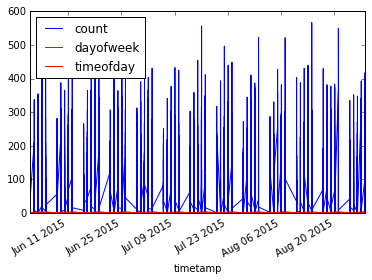

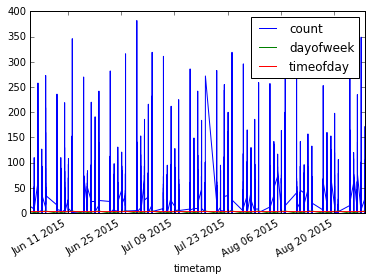

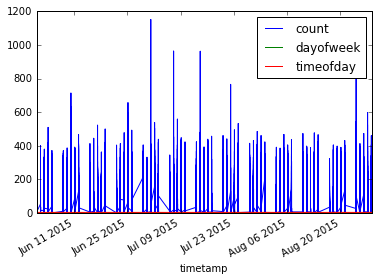

KeyboardInterrupt: 

In [171]:
df3[df3.dayofweek <= day_of_week.Fri].groupby('timeofday').plot()